# Name - Abhinav Kumar
# Roll no-23m1073

# Assignment 1- Linear Regression from Scratch

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt



# Question_1

In [2]:
# Function___
def data_matrix(N, S):
   
    M, D = S.shape

    # Generate random 2-D array of size NxM with standard normal distribution
    random_array = np.random.randn(N, M)

    # Multiply random array with generator matrix S to get X
    X = np.dot(random_array, S)

    return X

# Test Result___
N = 10  # rows of data matrix
M = 3    # columns of data matrix
D = 5    # Number of features in the output matrix
S = np.random.randn(M, D)  # generator matrix

X = data_matrix(N, S)
print(X)  

[[-1.90219211 -2.01203184  0.47206563  0.25485705 -1.72106642]
 [-2.67823539  0.00835988  1.02566337  0.27910265 -1.15732172]
 [ 0.66097056  0.16605285  0.23013564 -0.29875801 -0.4709095 ]
 [ 0.44404602  2.96937505  1.20237386 -0.61464544 -0.27547219]
 [-0.6812244  -4.80222939 -1.60987747  0.82016747 -0.1663107 ]
 [ 2.83576958  0.78510998 -1.32814591 -0.15058326  2.19660458]
 [-0.01637014  0.79316438  0.42614586 -0.17610115 -0.22810197]
 [-1.73961477 -4.6186336  -0.06575196  0.38144808 -2.55196497]
 [-1.12528384  0.61356522  0.84310318 -0.06298024 -0.81682868]
 [-3.04268968  0.03740163  1.49781957  0.15590601 -1.8946527 ]]


# Question_2

In [217]:
# FUNCTION____
def target_vector(X,w,sigma):
   
    
    Xw = np.dot(X, w[:-1]) + w[-1]  #.reshape(D,1))
   
    # generate zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(0, np.sqrt(sigma), size=(Xw.shape[0]))
   
    t = Xw + noise
    
   
    return t


N = 10 
D = 5   
X = np.random.rand(N, D)  # Data matrix

w = np.random.rand(D + 1)  # weight vector
sigma = 0.1  # Noise variance

t = target_vector(X,w,sigma)
print(t)



[1.76807933 1.98408235 1.20291982 1.0656783  1.52532562 2.01616748
 1.6091934  1.48805297 1.87399581 2.03754437]


# Question_3

In [151]:
def time_measure(N_values, D):
    times = []
   
    for N in N_values:
        # Generate a random data matrix of size NxD
        X = np.random.rand(N, D)
      

        # Measure the time taken to compute the pseudo-inverse 
        starting_time = time.time()
        
        np.linalg.pinv(X)
            
        ending_time = time.time()
        
        times.append(ending_time - starting_time)
       
    return times
   

N_values = np.logspace(1, 6,100, dtype=int) 


D = 10

# Measure the time taken for different values of N
times= time_measure(N_values, D)


# Plotting the results

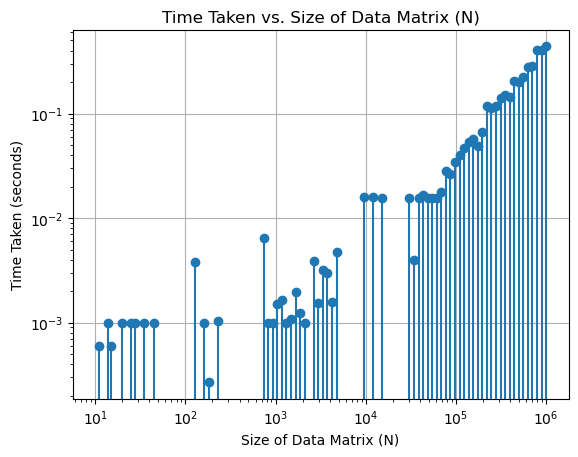

In [152]:
plt.stem(N_values,times)
plt.xscale('log')
plt.yscale('log')
plt.title('Time Taken vs. Size of Data Matrix (N)')
plt.xlabel('Size of Data Matrix (N)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.show()


# <h3>Observation:</h3>

1)Beyond the N=10^6 the pseudo-inverse computation increase significantly, leading to longer execution times.

2)Beyond the N>10^4  there is exponential increase in time taken w.r.t to size of matrix 



# Question_4

In [22]:
def cal_nrmse(t, p):
    
    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean((p-t) ** 2))    
    
    # Calculate the NRMSE
    nrmse = rmse / (np.std(t))
    
    return nrmse


In [7]:
target_vec = np.array([1, 2, 3, 4, 5])
predicted_vec= np.array([1.2, 2.1, 2.9, 4.2, 5.3])

nrmse = cal_nrmse(target_vec, predicted_vec)
print("NRMSE:", nrmse)


NRMSE: 0.1378404875209022


# QUESTION_5

In [33]:
def gradient_mse(X, y, w):
    
    # Number of data points
    n = X.shape[0]
    
    # Calculate predictions
    y_pred = np.dot(X, w)
    
    # Calculate the error
    error = y - y_pred 
    
    # Compute the gradient of MSE
    gradient = -(1/ n) * np.dot(X.T, error)
   
    return gradient


# Question_6

In [9]:
def gradient_L2(weights):
    
    gradient=2*weights 
    
    
 
    
    return gradient

# Question_7

In [10]:
def gradient_L1(weights):
  
    # Calculate the sign of each element in weights
    sign = np.sign(weights)

    return sign


# Question_8

In [123]:
def gradient_descent(X, y, learning_rate, lambda1, lambda2, max_iters, tol):
    """
    Perform gradient descent to minimize the MSE + lambda1 L1 + lambda2 L2 regularization term.
    """
    # Initialize weights with zeros
    num_features = X.shape[1]
    weights = np.zeros(num_features)

    # Perform gradient descent
    for _ in range(max_iters):
        # Compute predictions
        y_pred = np.dot(X, weights)

        # Compute gradient of MSE loss
        gradient_mse1 = gradient_mse(X, y, weights)

        # Compute gradient of L1 regularization
        gradient_l1 = lambda1 * gradient_L1(weights)

        # Compute gradient of L2 regularization
        gradient_l2 =  lambda2 * gradient_L2(weights)

        # Combine gradients
        gradient = gradient_mse1 + gradient_l1 + gradient_l2

        # Update weights
        weights -= learning_rate * gradient

      

        # Check convergence
        if np.linalg.norm(learning_rate * gradient) < tol:
            break

    return weights




# Question_9

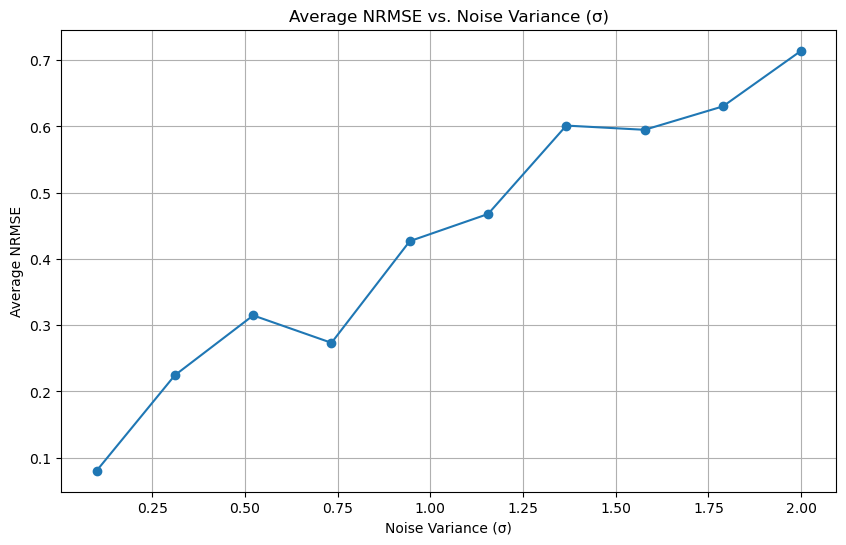

In [100]:
# Define parameters
num_runs = 5
sigmas = np.linspace(0.1, 2, num=10)  # Values of sigma to test
num_samples = 1000
num_features = 5
learning_rate = 0.01
lambda1=0.01
lambda2=0.01

max_iters=1000
tol=1e-6

# Initialize lists to store NRMSE for each sigma
average_nrmse = []

# Run the experiment for each value of sigma
for sigma in sigmas:
    nrmse_values = []
    
    # Run the experiment multiple times to get an average
    for _ in range(num_runs):
        # Generate synthetic data
        X = np.random.randn(num_samples, num_features)
        noise = np.random.normal(0, sigma, size=num_samples)
        true_weights = np.random.randn(num_features)
        y = np.dot(X, true_weights) + noise
        
        # Split data into training and validation sets
        split_idx = int(0.8 * num_samples)
        X_train, X_val = X[:split_idx], X[split_idx:]
        y_train, y_val = y[:split_idx], y[split_idx:]
        
        # Train linear regression model using gradient descent
        
        weight_s = gradient_descent(X_train, y_train, learning_rate, lambda1, lambda2, max_iters, tol)
        
        # Make predictions on the validation set
        y_pred = np.dot(X_val, weight_s)
        
        # Calculate NRMSE
        nrmse = cal_nrmse(y_val, y_pred)
        nrmse_values.append(nrmse)
    
    # Calculate average NRMSE for the current sigma
    average_nrmse.append(np.mean(nrmse_values))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sigmas, average_nrmse, marker='o')
plt.title('Average NRMSE vs. Noise Variance (σ)')
plt.xlabel('Noise Variance (σ)')
plt.ylabel('Average NRMSE')
plt.grid(True)
plt.show()


# Observation

1)As the noise variance sigma increases the NRMSE also increases

2)Higher noise variance making the model harder to accurately predict the target values.

# Question_10

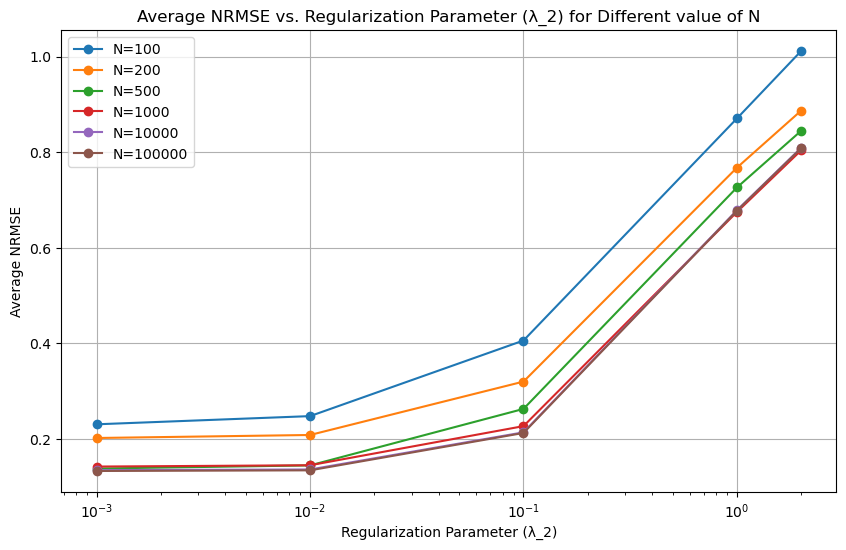

In [54]:
# Define parameters
num_runs = 5
Ns = [ 100, 200, 500,1000,10000,100000]
lambdas = [0.001, 0.01, 0.1, 1,2]
num_features=50

sigma = 0.1
learning_rate = 0.01
max_iters=1000
lambda1=0


# Initialize lists to store NRMSE for each combination of N and λ
average_nrmse = np.zeros((len(Ns), len(lambdas)))
w = np.random.rand(num_features + 1)
# Run the experiment for each combination of N and λ
for i, N in enumerate(Ns):
    l=np.identity(num_features)
    X1=data_matrix(N, l)
    y= target_vector(X1,w,sigma)
    for j, lmbda in enumerate(lambdas):
        nrmse_values = []
        
        # Run the experiment multiple times to get an average
        for _ in range(num_runs):
            
            
            # Split data into training and validation sets
            split_idx = int(0.8 * N)
            X_train, X_val = X1[:split_idx], X1[split_idx:]
            y_train, y_val = y[:split_idx], y[split_idx:]
        
           # Train linear regression model using gradient descent
            lambda2 =  lmbda
            weight_s = gradient_descent(X_train, y_train, learning_rate, lambda1, lambda2, max_iters, tol)
        
            # Make predictions on the validation set
            y_pred = np.dot(X_val, weight_s)
            
            # Calculate NRMSE
           
            nrmse = cal_nrmse(y_val, y_pred)
            nrmse_values.append(nrmse)
    
   
   
        
        # Calculate average NRMSE for the current combination of N and λ
        average_nrmse[i, j] = np.mean(nrmse_values)

# Plot the results
plt.figure(figsize=(10, 6))
for i, N in enumerate(Ns):
    plt.plot(lambdas, average_nrmse[i, :], marker='o', label=f'N={N}')
plt.xscale('log')
plt.xlabel('Regularization Parameter (λ_2)')
plt.ylabel('Average NRMSE')
plt.title('Average NRMSE vs. Regularization Parameter (λ_2) for Different value of N')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Observation

 1)NRMSE initially almost constant and after that it starts to increase again
 
 2)for constant N incresing Average NRMSE increases 
 
 3)for constant lemda_2 incresing Average NRMSE increases 
  

# Question_11

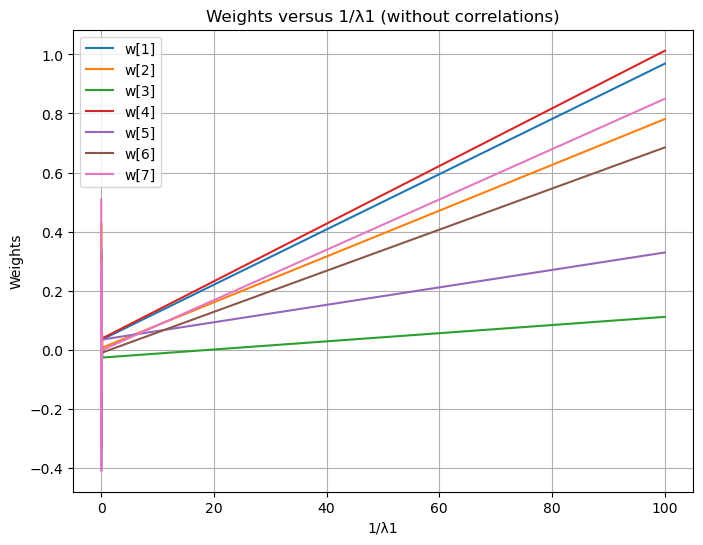

In [178]:
# Generate Data Matrix X without Correlations

num_samples = 1000
num_features = 7
sigma =3
max_iters=10000
tol=1e-6
learning_rate = 0.01

w = np.random.rand(num_features + 1)
l=np.identity(num_features)
X2=data_matrix(num_samples, l)
y2= target_vector(X2,w,sigma)

lambda2=0
#lambda1_values = [0,1,3,4,5]
lambda1_values =np.linspace(0.01,50,num=11)

weights_list = []

for lam in lambda1_values:
    weights = gradient_descent(X2, y2,learning_rate , lam,lambda2,max_iters,tol)
    weights_list.append(weights)

# Plot Weights versus λ1
plt.figure(figsize=(8, 6))

for i in range(num_features):
    weights_for_feature = [weights[i] for weights in weights_list]
    plt.plot(np.reciprocal(lambda1_values), weights_for_feature, label=f'w[{i + 1}]')

plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('Weights versus 1/λ1 (without correlations)')
plt.legend()
plt.grid(True)
plt.show()



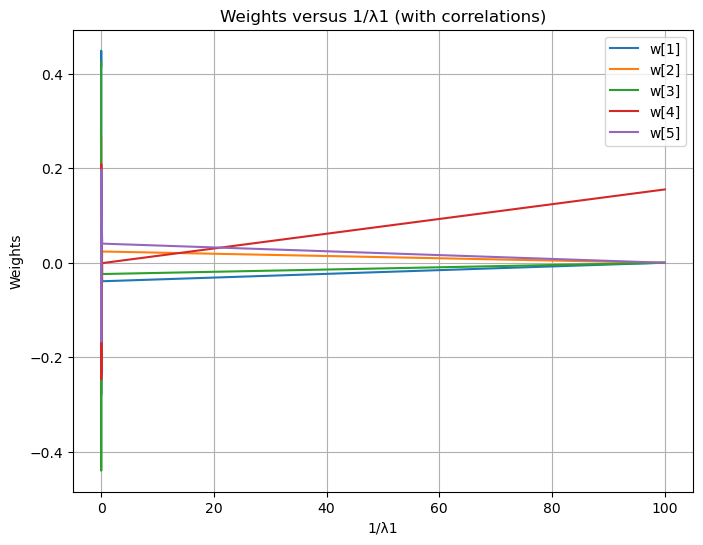

In [179]:
# Generate Data Matrix X with Correlations
num_samples = 1000
num_features = 5
sigma =3
max_iters=10000
tol=1e-6
learning_rate = 0.01

w = np.random.rand(num_features + 1)
l=np.identity(num_features)
X2=0.1*data_matrix(num_samples, l)
y2= target_vector(X2,w,sigma)

lambda2=0
#lambda1_values = [0,1,3,4,5]
lambda1_values =np.linspace(0.01,50,num=11)
weights_list = []

for lam in lambda1_values:
    weights = gradient_descent(X2, y2,learning_rate , lam,lambda2,max_iters,tol)
    weights_list.append(weights)

# Plot Weights versus λ1
plt.figure(figsize=(8, 6))

for i in range(num_features):
    weights_for_feature = [weights[i] for weights in weights_list]
    plt.plot(np.reciprocal(lambda1_values), weights_for_feature, label=f'w[{i + 1}]')

plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('Weights versus 1/λ1 (with correlations)')
plt.legend()
plt.grid(True)
plt.show()



1)For uncorrelated data, none of the weights go to zero.

2)for correlated data, the weights of the correlated columns reach zero before the others.

# Question_12

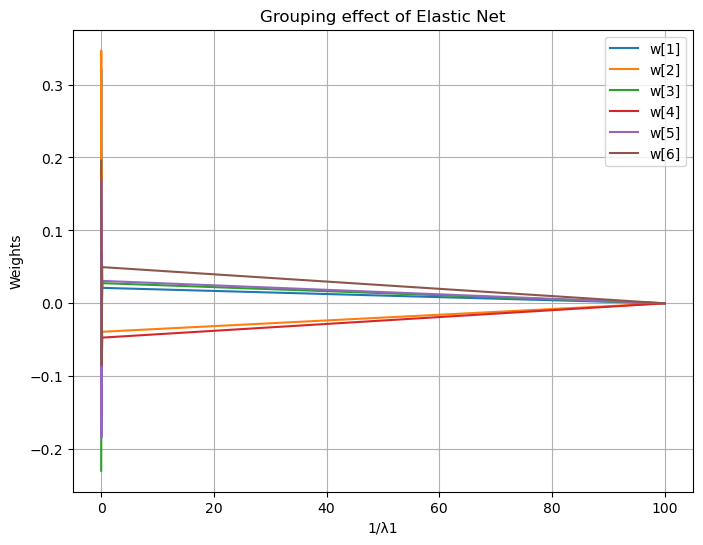

In [216]:
# Generate Data Matrix X with Correlations
num_samples = 1000
num_features = 6
sigma =3
max_iters=10000
tol=1e-6
learning_rate = 0.01

w = np.random.rand(num_features + 1)
l=np.identity(num_features)
X2=0.1*data_matrix(num_samples, l)
y2= target_vector(X2,w,sigma)

lambda2=0.01
#lambda1_values = [0,1,3,4,5]
lambda1_values =np.linspace(0.01,50,num=11)
weights_list = []

for lam in lambda1_values:
    weights = gradient_descent(X2, y2,learning_rate , lam,lambda2,max_iters,tol)
    weights_list.append(weights)

# Plot Weights versus λ1
plt.figure(figsize=(8, 6))

for i in range(num_features):
    weights_for_feature = [weights[i] for weights in weights_list]
    plt.plot(np.reciprocal(lambda1_values), weights_for_feature, label=f'w[{i + 1}]')

plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('Grouping effect of Elastic Net')
plt.legend()
plt.grid(True)
plt.show()



1) It is observed that the value of 1/lembda1 increases, the weight goes to zero.

2) The weights of the correlated columns go to zero together. This is the grouping effect of elastic net due to L2 regularization.

# Question_13

In [195]:
def binary_classification_y_t(X, w, sigma):
    # Compute the linear response
    z = np.dot(X, w_true)

    # Apply sigmoid function to obtain probabilities
    y= 1 / (1 + np.exp(-z))

    # Add Gaussian noise with variance sigma
    
    noise = np.random.normal(0, sigma, N)
    y += noise

    # Convert probabilities to binary labels
    t = np.where(y >= 0,1,0)

    return y,t


In [196]:
# Example 
N = 50 
D = 5    
sigma = 4  # Noise variance

# Generate random feature matrix X
X = np.random.randn(N, D)

# Generate true weights w_true
w_true = np.random.randn(D)

y1,t1 = binary_classification_y_t(X, w_true, sigma)

    
print("Generated linear binary classification vector t:")
print(t1)


Generated linear binary classification vector t:
[1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 0 1 1 0 0]


# Question_14

In [197]:
def entropy_gradient(X, y1,t1):

  

    # Compute the gradient of binary cross-entropy
    gradient = np.dot( (y1 - t1),X) 

    return gradient




In [199]:

# Compute the gradient of binary cross-entropy
y7,t7=  binary_classification_y_t(X, w, sigma)
gradient = entropy_gradient(X, y7, t7)
print("Gradient:", gradient)


Gradient: [11.91116462 -4.20536663  6.1667828  31.53131535 16.99798219]


# Question_15

In [203]:
def gradient_binary(X, y, learning_rate, lambda1, lambda2, max_iters, tol):
    """
    Perform gradient descent to minimize the MSE + lambda1 L1 + lambda2 L2 regularization term.
    """
    # Initialize weights with zeros
    num_features = X.shape[1]
    weights = np.zeros(num_features)

    # Perform gradient descent
    for _ in range(max_iters):
        # Compute predictions
        y_pred = np.dot(X, weights)

        # Compute gradient of MSE loss
        gradient_bce = entropy_gradient(X, y1,t1)

        # Compute gradient of L1 regularization
        gradient_l1 = lambda1 * gradient_L1(weights)

        # Compute gradient of L2 regularization
        gradient_l2 =  lambda2 * gradient_L2(weights)

        # Combine gradients
        gradient = gradient_bce + gradient_l1 + gradient_l2

        # Update weights
        weights -= learning_rate * gradient

      

        # Check convergence
        if np.linalg.norm(learning_rate * gradient) < tol:
            break

    return weights



In [204]:
def misclassification_error(t,z):
  no_misclass = 0
  for i in range(len(t)):
    #Count no of misclassifications
    if t[i] != z[i]:
      no_misclass += 1

  #Calculate the misclassification error
  misc_error = no_misclass / len(t)
  return misc_error

# Reference

1. https://www.python-unleashed.com/post/derivation-of-the-binary-cross-entropy-loss-gradient
2. https://chat.openai.com/c/8e43d974-0377-4471-a270-ce59c9f775a0
3. https://stackoverflow.com/questions/7370801/how-do-i-measure-elapsed-time-in-python
4. https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0
5. https://chat.openai.com/c/b571e8d8-dc19-48c3-882b-d53c091fa7ac